In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_army_solve(a0, b0, alpha, beta):
    a = lambda t: a0 * np.cosh(np.sqrt(alpha * beta) * t) - np.sqrt(beta / alpha) * np.sinh(np.sqrt(alpha * beta)*t) * b0
    b = lambda t: b0 * np.cosh(np.sqrt(alpha * beta) * t) - np.sqrt(alpha / beta) * np.sinh(np.sqrt(alpha * beta)*t) * a0
    print(f"C={alpha * a0 * a0 - beta * b0 * b0}")
    return a, b

C=-10.299999999999983


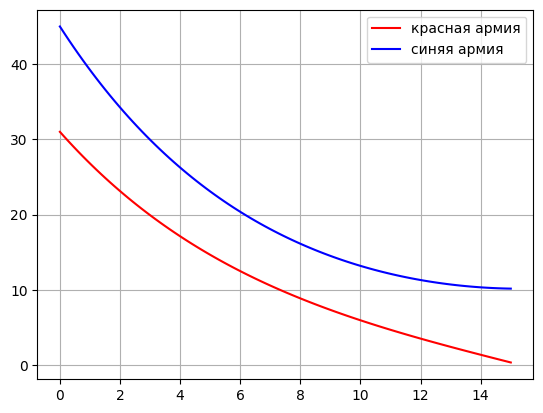

In [4]:
beta = 0.1
alpha = 2 * beta
A, B = get_army_solve(31, 45, alpha, beta)
t = np.linspace(0, 15, 100)
Y1 = list(map(A, t))
Y2 = list(map(B, t))
plt.plot(t,
 Y1, c='r', label='красная армия')
plt.plot(t, Y2, c='b', label='синяя армия')
plt.legend()
plt.grid()
plt.show()

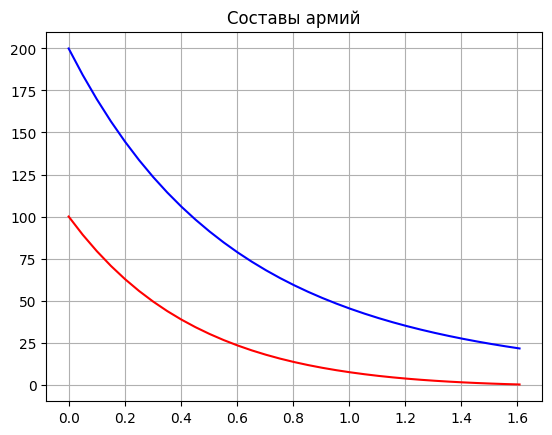

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

a = 1.7
c = 0.3
d = 2.1
e = 1.2
g = 0.9
h = 1.2

def armies(t, y):
    A, B = y
    dA_dt = -a * A - c * B + d
    dB_dt = -e * B - g * A + h
    return [dA_dt, dB_dt]

A0 = 100
B0 = 200

time = (0, 10)
t_eval = np.linspace(time[0], time[1], 200)
sol = solve_ivp(armies, time, [A0, B0], t_eval=t_eval)
slice_ind = 0
for i in range(min(len(sol.y[0]), len(sol.y[1]))):
    if sol.y[0][i] <= 0 or sol.y[1][i] <= 0:
        slice_ind += 1
plt.plot(sol.t[:slice_ind], sol.y[0][:slice_ind], "r")
plt.plot(sol.t[:slice_ind], sol.y[1][:slice_ind], 'b')
plt.title('Составы армий')
plt.grid()
plt.show()
